In [17]:
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator

In [18]:
#Bell States are maximally entanglement forms, so we have 2 possibilities of measuring with the same probability
#There are 4 of them, taking one as example:
#|φ+⟩ = 1/√2(|00⟩ + |11⟩), so if qubit 0 is |0⟩, the qubit 1 is always be |0⟩ and the same with |1⟩
#The four bell states are:
#|φ+⟩ = 1/√2(|00⟩ + |11⟩)
#|φ-⟩ = 1/√2(|00⟩ - |11⟩)
#|ψ+⟩ = 1/√2(|01⟩ + |10⟩)
#|ψ-⟩ = 1/√2(|01⟩ - |10⟩)
#And that's how to make all of them in qiskit:

In [19]:
#Disclaimer: to create a bell state we always use a Hadamard and a CNOT gate, the difference will be the the input state of both qubits

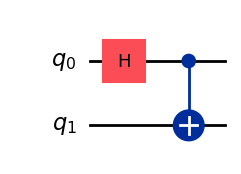

In [20]:
#|φ+⟩ phi plus(pp)
#Defining our circuit:
qc_pp = QuantumCircuit(2) #two qubits

#How we didn't defined the state of them, both qubits starts naturally in state |0⟩

#And we will need to apply the mentioned gates:
qc_pp.h(0)
qc_pp.cx(0, 1)

#We can also visualizate our circuit:
qc_pp.draw('mpl')

In [21]:
#And to vizualizate our states we create a Statevector in our circuit and draw it:
q1 = Statevector(qc_pp)
q1.draw('latex')

<IPython.core.display.Latex object>

In [22]:
#So if the input is |00⟩, we will have |φ+⟩

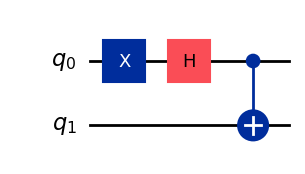

In [23]:
#|φ-⟩ phi minus(pm)
#Defining our circuit:
qc_pm = QuantumCircuit(2) #two qubits

#How qubits start in state |0⟩, we will apply the X gate in first qubit, so it will start in |1⟩, meanwhile, second qubit still |0⟩
qc_pm.x(0)

#Apply the gates:
qc_pm.h(0)
qc_pm.cx(0, 1)

#Draw our circuit:
qc_pm.draw('mpl')

In [24]:
#And vizualizate our states:
q2 = Statevector(qc_pm)
q2.draw('latex')

<IPython.core.display.Latex object>

In [25]:
#So if the input is |10⟩, we will have |φ-⟩

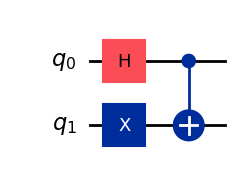

In [26]:
#|ψ+⟩ psi plus(psp)
#Defining our circuit:
qc_psp = QuantumCircuit(2) #two qubits

#In that case we apply x gate to second qubit to swipe it to |1⟩, meanwhile, first qubit still |0⟩
qc_psp.x(1)

#Apply the gates:
qc_psp.h(0)
qc_psp.cx(0, 1)

#Draw our circuit:
qc_psp.draw('mpl')

In [27]:
#And vizualizate our states:
q3 = Statevector(qc_psp)
q3.draw('latex')

<IPython.core.display.Latex object>

In [28]:
#So if the input is |01⟩, we will have |ψ+⟩

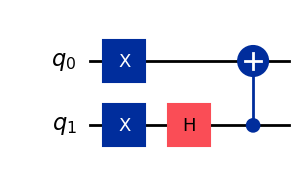

In [29]:
#|ψ+⟩ psi minus(psm)
#Defining our circuit:
qc_psm = QuantumCircuit(2) #two qubits

#For the last case we will apply x gate to both qubits, so them will be swiped to |1⟩
qc_psm.x(0)
qc_psm.x(1)

#But that time we need to revert the target qubit because the order what we was using will generate another state intead psi minus:
qc_psm.h(1)
qc_psm.cx(1, 0)

#Draw our circuit:
qc_psm.draw('mpl')

In [30]:
#And vizualizate our states:
q4 = Statevector(qc_psm)
q4.draw('latex')

<IPython.core.display.Latex object>

In [45]:
#So if the input is |11⟩, we will have |ψ-⟩

In [48]:
#To finish, we can simulate our bell gates to see if the entanglement are working:

#So let's create a circuit with state |ψ+⟩
qc = QuantumCircuit(2, 2) #2 qubit and 2 classical bits(because we need them to measure our qubits)
qc.x(1)
qc.h(0)
qc.cx(0, 1)

#And we apply the measure to our qubits and  store the measure in a classical bit:
qc.measure(0, 0) #measuring qubit 0 in classical bit 0
qc.measure(1, 1) #measuring qubit 1 in classical bit 1

#So we define our simulator:
sim = BasicSimulator()

#And use that function to store the results of 100 measuring:
counts = sim.run(qc, shots=100).result().get_counts()

#So we print it:
print(counts)

{'01': 47, '10': 53}


In [ ]:
#And we see what always the first qubit is |0⟩, second qubit is |1⟩ and vice-versa
#So, our bell gates are working